In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

: 

In [ ]:
# Read the CSV file with semicolon separator
df = pd.read_csv('dataset_phk_2024.csv', sep=';', header=None, skiprows=1, names=['No', 'Provinsi', 'TenagaKerjaPHK'])

In [ ]:
# Remove quotes and commas from 'TenagaKerjaPHK'
df['TenagaKerjaPHK'] = df['TenagaKerjaPHK'].str.replace('"', '')
df['TenagaKerjaPHK'] = df['TenagaKerjaPHK'].str.replace(',', '')

# Convert 'TenagaKerjaPHK' to integer
df['TenagaKerjaPHK'] = df['TenagaKerjaPHK'].astype(int)

In [ ]:
# Total layoffs
total_phk = df['TenagaKerjaPHK'].sum()
print(f"Total PHK up to November 2024: {total_phk}")

# Top 5 provinces with highest PHK
top_provinces = df.nlargest(5, 'TenagaKerjaPHK')
print("Top 5 Provinces with Highest PHK:")
print(top_provinces[['Provinsi', 'TenagaKerjaPHK']])

# Bottom 5 provinces with lowest PHK
bottom_provinces = df.nsmallest(5, 'TenagaKerjaPHK')
print("\nBottom 5 Provinces with Lowest PHK:")
print(bottom_provinces[['Provinsi', 'TenagaKerjaPHK']])

# Percentage of total PHK per province
df['Percentage'] = (df['TenagaKerjaPHK'] / total_phk) * 100
print("\nPercentage of Total PHK per Province:")
print(df[['Provinsi', 'Percentage']])

Total PHK up to November 2024: 59311
Top 5 Provinces with Highest PHK:
          Provinsi  TenagaKerjaPHK
10     DKI Jakarta           14501
12     Jawa Tengah           13012
15          Banten           10727
14      Jawa Timur            3757
13  DI. Yogyakarta            2295

Bottom 5 Provinces with Lowest PHK:
               Provinsi  TenagaKerjaPHK
32          Papua Barat               0
33                Papua               0
29       Sulawesi Barat              10
31         Maluku Utara              15
18  Nusa Tenggara Timur              27

Percentage of Total PHK per Province:
               Provinsi  Percentage
0                  Aceh    0.810979
1        Sumatera Utara    1.075686
2        Sumatera Barat    0.885165
3                  Riau    1.869805
4                 Jambi    0.355752
5      Sumatera Selatan    0.939118
6              Bengkulu    0.077557
7               Lampung    0.173661
8       Bangka Belitung    3.206825
9        Kepulauan Riau    1.036907
10     

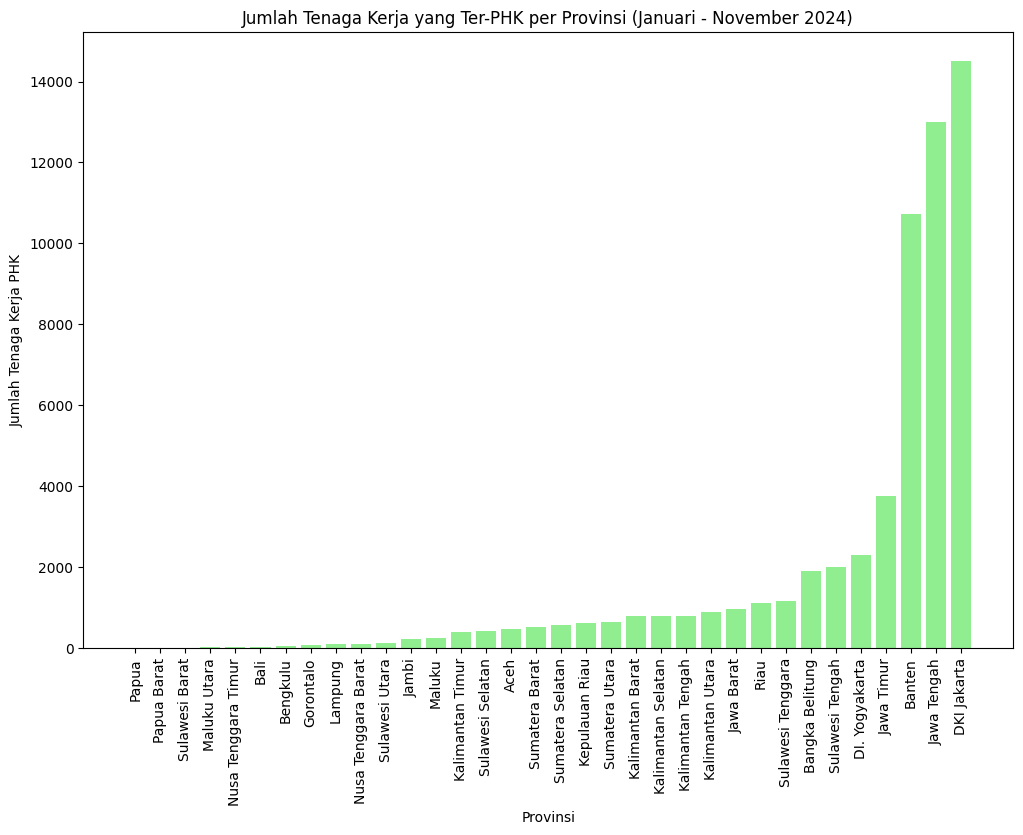

In [ ]:
# Bar chart of PHK per province (Ascending order)
plt.figure(figsize=(12, 8))
df_sorted_asc = df.sort_values(by='TenagaKerjaPHK', ascending=True)
plt.bar(df_sorted_asc['Provinsi'], df_sorted_asc['TenagaKerjaPHK'], color='lightgreen')
plt.xlabel('Provinsi')
plt.ylabel('Jumlah Tenaga Kerja PHK')
plt.title('Jumlah Tenaga Kerja yang Ter-PHK per Provinsi (Januari - November 2024)')
plt.xticks(rotation=90)
plt.show()

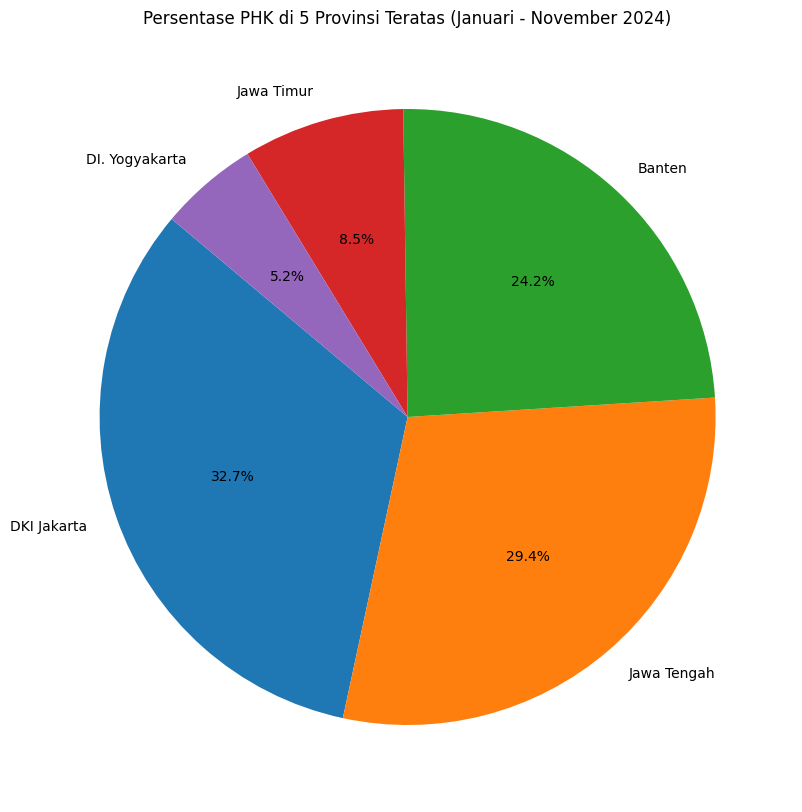

In [ ]:
# Pie chart of top 5 provinces
plt.figure(figsize=(10, 10))
plt.pie(top_provinces['TenagaKerjaPHK'], labels=top_provinces['Provinsi'], autopct='%1.1f%%', startangle=140)
plt.title('Persentase PHK di 5 Provinsi Teratas (Januari - November 2024)')
plt.show()